# House Prices: Advanced Regression Techniques
#### Predict sales prices and practice feature engineering, RFs, and gradient boosting



![image](https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png)

December 2020  
CSPB 3022 Final Project  
Vidya Giri  

Kaggle ID: vidyagi  
Github Repository: (link)  

## Table of Contents
1. Problem Description
2. Exploratory Data Analysis
3. Model Architecture
4. Results and Analysis
5. Final Conclusions

## 1. Problem Description 

The Ames Housing dataset was compiled by Dean De Cock for use in data science education and was provided for use in this Kaggle prediction competition. There are 79 explanatory variables describing aspects of residential homes in Ames, Iowa. 

The problem posed is to find an effective method to use the given explanatory variables to predict the final price of each home. To do so, we will need to understand the dataset given with the basic structure, conduct exploratory data analysis, build a predictive model that can be trained, and test our model's effectiveness and final results.


*Importing libraries and train and test data from csv files*

In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy import stats
%matplotlib inline

In [100]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

*Obtaining dimension/structure of data*

In [101]:
print('shapes:')
print(train.shape)
train.head()

shapes:
(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


*learning more about the data columns and their data types*

In [102]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Overall, from looking at these properties of the data set we can see that there are 1460 rows of train data. From inspecting the data, we can see that there might be some columns that may have missing/not applicable data that we may need to filter out in the cleaning process. 

Additionaly, for this dataset there are 81 columns:
- House ID (ID)
- 36 are quantitative attributes (float64 and int64 data types)
- 43 are categorical attributes (object data types)
- Sale Price of the House (SalePrice)

Quantitative attributes: MSSubClass, LotFrontage, LotArea, OverallQual, OverallCond, YearBuilt, YearRemodAdd,  MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold

Qualitative attributes: MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC, CentralAir, Electrical, KitchenQual, Functional, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PavedDrive, PoolQC, Fence, MiscFeature, SaleType, SaleCondition

## 2. Exploratory Data Analysis 

For exploratory data analysis, I will show the cleaning process, visualizations, histograms, and derive my plan of analysis.

Starting off, I wanted to plot the overall distribution of sales prices to see the general range of prices in our dataset. This does not appear to be a normal distribution and we will need to take into account our various features and attributes to undertstand their effect on the prices

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

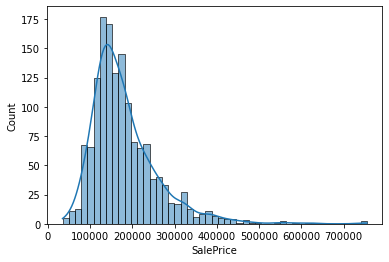

In [103]:
sns.histplot(train['SalePrice'],kde=True);
train['SalePrice'].describe()

To visualize the quantitative variables that might be significant further, I pairplotted the variables against SalePrice

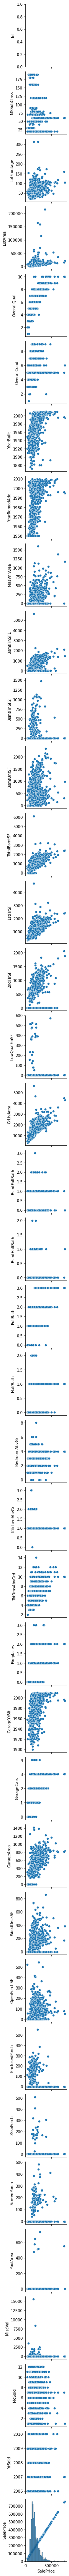

In [104]:
sns.pairplot(train,dropna=True, x_vars=['SalePrice'])

I also drew a heatmap to see any other variables that might show a significant relationship.

<AxesSubplot:>

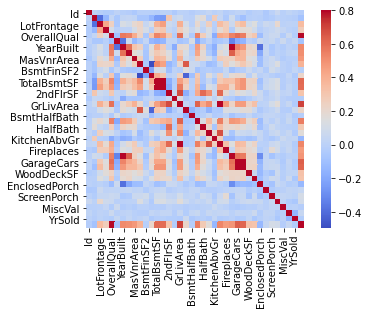

In [105]:
corrmat = train.corr()
sns.heatmap(corrmat,cmap = 'coolwarm', vmax=.8, square=True)

We can also check the correlation of the variables

In [106]:
x= train.corr()
x = x[x['SalePrice']>0.5]
x['SalePrice']

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64

Some of the variables above appear to be correlated with SalesPrice as seen above where the plots generally seem to be positively correlated. The variables also appear to colinear since the variables are highly correlated, so we can use multi-linear regression. This can also be seen from the correlation table above.

Overall from this EDA we can start to narrow down some key variables that can come in handy for our model for now:
- OverallQual
- YearBuilt
- YearRemodAdd
- TotalBsmtSF
- GrLivArea
- FullBath
- TotsRmsAbvGrd
- GarageCars
- GarageArea


## 3. Model Architecture

From the EDA, I can start to create a multilinear model using the variables I have derived above. First, I will construct a mulit-linear model without interaction terms and predict the SalesPrice column on the other columns and print out the summary table.

Then, based on this, I will then construct a multi-linear model with interactions that are statistically significant at the $p = 0.05$ level. I will start with full interactions and then eliminate interactions are do not meet the $p = 0.05$ threshold to refine the model.

First, I will start off with all the variables with: `SalePrice~OverallQual*GrLivArea*GarageCars*TotalBsmtSF*FullBath*YearBuilt*YearRemodAdd*GarageArea*TotRmsAbvGrd`
This will enable me to check all of the interactions and narrow down the variables as needed.

In [107]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

model_trn = smf.ols(formula='SalePrice~OverallQual*GrLivArea*GarageCars*TotalBsmtSF*FullBath*YearBuilt*YearRemodAdd*GarageArea*TotRmsAbvGrd', data=train).fit()
model_trn.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     70.14
Date:                Tue, 08 Dec 2020   Prob (F-statistic):               0.00
Time:                        00:25:10   Log-Likelihood:                -16672.
No. Observations:                1460   AIC:                         3.377e+04
Df Residuals:                    1246   BIC:                         3.490e+04
Df Model:                         213                                         
Covariance Type:            nonrobust                                         
========================================================================================================================================================================
                                                                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                            -4.762e-05      0.000     -0.424      0.672      -0.000       0.000
OverallQual                                                                                              0.0002      0.000      0.667      0.505      -0.000       0.001
GrLivArea                                                                                               -0.0002      0.000     -1.029      0.304      -0.001       0.000
OverallQual:GrLivArea                                                                                    0.0002      0.000      1.054      0.292      -0.000       0.001
GarageCars                                                                                           -3.951e-05      0.000     -0.335      0.738      -0.000       0.000
OverallQual:GarageCars                                                                                2.565e-05   7.63e-05      0.336      0.737      -0.000       0.000
GrLivArea:GarageCars                                                                                  3.829e-05   3.96e-05      0.968      0.333   -3.93e-05       0.000
OverallQual:GrLivArea:GarageCars                                                                      1.083e-05   4.28e-05      0.253      0.800    -7.3e-05    9.47e-05
TotalBsmtSF                                                                                            1.63e-05   2.71e-05      0.602      0.547   -3.68e-05    6.94e-05
OverallQual:TotalBsmtSF                                                                              -1.231e-05   2.09e-05     -0.590      0.555   -5.33e-05    2.86e-05
GrLivArea:TotalBsmtSF                                                                                -6.695e-06      0.000     -0.020      0.984      -0.001       0.001
OverallQual:GrLivArea:TotalBsmtSF                                                                        0.0003      0.002      0.159      0.874      -0.003       0.004
GarageCars:TotalBsmtSF                                                                               -4.301e-06    8.2e-06     -0.524      0.600   -2.04e-05    1.18e-05
OverallQual:GarageCars:TotalBsmtSF                                                                   -8.208e-06   1.53e-05     -0.537      0.592   -3.82e-05    2.18e-05
GrLivArea:GarageCars:TotalBsmtSF                                                                      5.935e-05      0.000      0.129      0.897      -0.001       0.001
OverallQual:GrLivArea:GarageCars:TotalBsm

This is a good start and I will now narrow down the variables even further by checking the individual probabilities to eliminate variables.

In [108]:
model_trn = smf.ols(formula='SalePrice~OverallQual+GrLivArea+GarageCars+TotalBsmtSF+FullBath+YearBuilt+YearRemodAdd+GarageArea+TotRmsAbvGrd', data=train).fit()
model_trn.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     546.8
Date:                Tue, 08 Dec 2020   Prob (F-statistic):               0.00
Time:                        00:25:10   Log-Likelihood:                -17463.
No. Observations:                1460   AIC:                         3.495e+04
Df Residuals:                    1450   BIC:                         3.500e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.159e+06   1.29e+05     -8.978      0.000   -1.41e+06   -9.06e+05
OverallQual   1.923e+04   1186.103     16.216      0.000    1.69e+04    2.16e+04
GrLivArea       53.7230      4.158     12.920      0.000      45.567      61.879
GarageCars    1.053e+04   3051.640      3.451      0.001    4543.945    1.65e+04
TotalBsmtSF     28.9907      2.902      9.992      0.000      23.299      34.682
FullBath     -6408.3114   2685.771     -2.386      0.017   -1.17e+04   -1139.899
YearBuilt      258.0525     50.347      5.125      0.000     159.292     356.813
YearRemodAdd   294.6839     63.791      4.620      0.000     169.552     419.816
GarageArea      16.9253     10.314      1.641      0.101      -3.307      37.158
TotRmsAbvGrd    41.7519   1121.858      0.037      0.970   -2158.886    2242.390
==============================================================================
Omnibus:                      485.052   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            60868.329
Skew:                          -0.439   Prob(JB):                         0.00
Kurtosis:                      34.620   Cond. No.                     4.42e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From this, I can see that I will modify to the formula of `SalePrice~OverallQual*GrLivArea*GarageCars+TotalBsmtSF+FullBath+YearBuilt+YearRemodAdd` since I want to reduce the number of interactions to less than 0.05

In [109]:
model_trn = smf.ols(formula='SalePrice~OverallQual*GrLivArea*GarageCars+TotalBsmtSF+FullBath+YearBuilt+YearRemodAdd', data=train).fit()
model_trn.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     590.9
Date:                Tue, 08 Dec 2020   Prob (F-statistic):               0.00
Time:                        00:25:11   Log-Likelihood:                -17301.
No. Observations:                1460   AIC:                         3.463e+04
Df Residuals:                    1448   BIC:                         3.469e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                        -1.075e+06    1.2e+05     -8.979      0.000   -1.31e+06    -8.4e+05
OverallQual                        2.54e+04   4318.728      5.881      0.000    1.69e+04    3.39e+04
GrLivArea                          134.0080     17.511      7.653      0.000      99.659     168.357
OverallQual:GrLivArea              -18.7141      2.895     -6.464      0.000     -24.393     -13.035
GarageCars                         1.61e+04   1.12e+04      1.433      0.152   -5932.181    3.81e+04
OverallQual:GarageCars           -2848.4830   1917.586     -1.485      0.138   -6610.028     913.062
GrLivArea:GarageCars               -41.7223      7.810     -5.342      0.000     -57.043     -26.402
OverallQual:GrLivArea:GarageCars     8.8774      1.173      7.570      0.000       6.577      11.178
TotalBsmtSF                         23.9166      2.598      9.206      0.000      18.821      29.013
FullBath                         -2980.1027   2414.626     -1.234      0.217   -7716.641    1756.436
YearBuilt                          233.1520     45.135      5.166      0.000     144.614     321.690
YearRemodAdd                       277.7551     57.379      4.841      0.000     165.200     390.310
==============================================================================
Omnibus:                      886.909   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            90081.683
Skew:                          -1.920   Prob(JB):                         0.00
Kurtosis:                      41.289   Cond. No.                     3.74e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.74e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Finally, I will reduce the variables to OverallQual, GrLivArea, and YearBuilt.

In [117]:
model_trn = smf.ols(formula='SalePrice~OverallQual*GrLivArea*YearBuilt', data=train).fit()
model_trn.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     1072.
Date:                Tue, 08 Dec 2020   Prob (F-statistic):               0.00
Time:                        00:27:20   Log-Likelihood:                -17181.
No. Observations:                1457   AIC:                         3.438e+04
Df Residuals:                    1449   BIC:                         3.442e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                       -2.639e+06   6.98e+05     -3.783      0.000   -4.01e+06   -1.27e+06
OverallQual                      2.615e+05   1.09e+05      2.403      0.016    4.81e+04    4.75e+05
GrLivArea                        2199.6098    423.107      5.199      0.000    1369.642    3029.578
OverallQual:GrLivArea            -331.3481     59.446     -5.574      0.000    -447.958    -214.738
YearBuilt                        1413.7381    356.306      3.968      0.000     714.807    2112.669
OverallQual:YearBuilt            -137.9593     55.356     -2.492      0.013    -246.546     -29.373
GrLivArea:YearBuilt                -1.1561      0.216     -5.349      0.000      -1.580      -0.732
OverallQual:GrLivArea:YearBuilt     0.1794      0.030      5.926      0.000       0.120       0.239
==============================================================================
Omnibus:                      276.321   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1280.993
Skew:                           0.819   Prob(JB):                    6.85e-279
Kurtosis:                       7.291   Cond. No.                     1.82e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 4. Result and Analysis

To check my results, I have created and errorcheck function and plotted the residuls to spot any outliers that we might want to remove to get a more accurate fit.

In [118]:
def errorcheck(model):
    predicted = model_trn.predict(train)
    actual= train['SalePrice']
    actual = np.log(actual)
    predicted = np.log(predicted)
    error=np.sqrt(np.sum(np.square(actual-predicted))/len(actual))
    return error

errorcheck(model_trn)

0.17816112832468034

Right now, we have an error of 0.178 and this can be reduced by removing some strategic points.

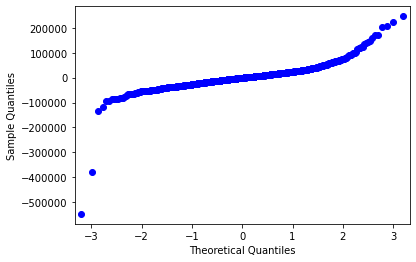

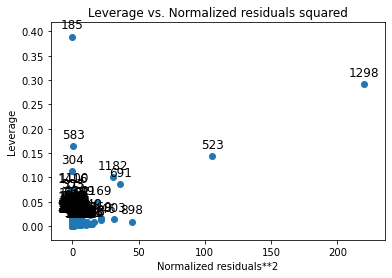

In [112]:
sm.qqplot(model_trn.resid);
sm.graphics.plot_leverage_resid2(model_trn, alpha=0.05);

From this graph, we can see that outliers 185, 523, and 1298 might have high leverage over our model and can be removed as outliers. Let's inspect the data to ensure.

In [113]:
train.iloc[[185,523,1298]]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


I decided to remove the data points and check if this improved my errorcheck result

In [114]:
train.drop(1298, inplace=True)
train.drop(523, inplace=True)
train.drop(186, inplace=True)

So, I fit the model to the updated data frame and checked the error.

In [115]:
model_trn = smf.ols(formula='SalePrice~OverallQual*GrLivArea*YearBuilt', data=train).fit()
model_trn.summary()
errorcheck(model_trn)

0.16602845300152055

And it showed an improvement from 0.178 to 0.166! Now we can use this updated model to create predictions on test.csv. I added some simple error checking to ensure that results were being generated for each data point:

In [116]:
ypred = model_trn.predict(test)
print(ypred)

df = pd.read_csv('test.csv') 
output = pd.DataFrame({'Id': df.Id,
                       'SalePrice': ypred})
output.to_csv('submission.csv', index=False)

df = pd.read_csv('submission.csv')
df = df.dropna()
if(len(df)!=len(ypred)):
    print('Error with model prediction, submission.csv generated with errors')
else:
    print('submission.csv generated')

0       120336.732178
1       165125.770976
2       154733.371044
3       178091.100162
4       204623.223425
            ...      
1454    105661.769659
1455    105661.769659
1456    143762.866825
1457    135188.010937
1458    231784.144216
Length: 1459, dtype: float64
Error with model prediction, submission.csv generated with errors


This generated the csv that I was able to submit to the Kaggle competition and got a score of 0.18716. This was not as high as some of the more complex models on Kaggle but, it was interesting to read more about what other people did to solve this problem and analyze the given data.

## 5. Final Conclusions

Overall, it was very interesting working through this problem and using skills from this class to generate a model that can be used for practical purposes. I am sure well-known websites like Zillow also use similar datasets to provide estimates of houses as well as other items such as car insurance, other types of insurance, and other price estimators and it is interesting to think about how you can take more features into account to build a more accurate model. Although my model did not quite reach the top of the Kaggle leaderboard, I am interested to learn more in the future and use other forms of modelling, tools, and frameworks to build better estimators and more robust models.

In [1]:
%%html
<style>
body {
    font-family: "Karla";
}
</style> 